<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/MN_T8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def check_diag_dom(matriz):
    n=len(matriz)
    diago_dom=True
    for i in range(n):
        sum=0
        for j in range(n):
            sum+=matriz[i][j]
        if(2*matriz[i][i]<sum):
            diago_dom=False;
            break;
    return (diago_dom)

In [2]:
import math
def dist_rel(x,y):#x=(x_1,x_2,...x_n), y=(y_1,y_2,...y_n)
    numerador=0
    denominador=0
    for i in range(len(x)):
        numerador+=(x[i]-y[i])**2
        denominador+=(x[i])**2
    return(math.sqrt(numerador/denominador))

In [3]:
import numpy as np
def Jacobi(matriz,b,tol=10**(-6),max_iter=100,**x_0,):
    if(not check_diag_dom(matriz)): 
        return("la matriz no es diagonalmente dominante")
    else:
        count=0
        n=len(matriz)
        if(x_0):
            x_0=x_0['x_0']
            x_1=np.zeros(n)
        else:
            x_0=np.zeros(n)
            x_1=np.zeros(n)
        while(count<=max_iter):
            count+=1
            for i in range(n):
                sum=0
                for j in range(n):
                    if(j!=i):
                        sum+=matriz[i][j]*x_0[j]
                x_1[i]=(b[i]-sum)/matriz[i][i]
            if(np.linalg.norm(np.array(x_1)-np.array(x_0))<tol):
                print("numero de iteraciones: ",count)
                return (x_1)
            else:
                x_0=x_1
                x_1=np.zeros(n)
        return ("Iteracion maxima alcanzada")
        

In [4]:
def Gauss_Seidel(matriz,b,tol=10**(-6),max_iter=100,**x_0,):
    if(not check_diag_dom(matriz)): 
        return("la matriz no es diagonalmente dominante")
    else:
        count=0
        n=len(matriz)
        if(x_0):
            x_0=x_0['x_0']
        else:
            x_0=np.zeros(n)
        while(count<=max_iter):
            count+=1
            x_1=np.copy(x_0)
            for i in range(n):
                sum=0
                for j in range(n):
                    if(j!=i):
                        sum+=matriz[i][j]*x_0[j]
                x_0[i]=(b[i]-sum)/matriz[i][i]
            if(np.linalg.norm(np.array(x_1)-np.array(x_0))<tol):
                print("numero de iteraciones: ",count)
                return (x_0)
        return("Iteracion maxima alcanzada")
            

In [5]:
matriz=[[10,2,1],[1,5,1],[2,3,10]]
b=[7,-8,6]
tol=0.05
x_0=[0.1,-1.7,0.9]
Jacobi(matriz,b,tol=10**(-3),x_0=x_0)

numero de iteraciones:  8


array([ 0.99989363, -2.00012224,  0.99984466])

In [6]:
matriz=[[10,2,1],[1,5,1],[2,3,10]]
b=[7,-8,6]
tol=0.05
x_0=[0.1,-1.7,0.9]
Gauss_Seidel(matriz,b,tol=10**(-3),x_0=x_0)

numero de iteraciones:  4


[1.0000151244, -2.00002226408, 1.000003654344]

In [7]:
def superior(list,b):
  n=len(list)
  X=[b[n-1]/list[n-1][n-1]]
  X_inv=[X[0]]
  for i in range(1,n):#len(list) es el número de renglones de la matriz
    acum=0
    for j in range(i):#0<=j<=i-1 
      acum+=X[j]*list[n-i-1][n-1-j]
    X.append((b[n-1-i]-acum)/list[n-1-i][n-1-i])
    X_inv.insert(0,X[i])
  return X_inv
def inferior(list,b):#list debe contener las entradas de la matriz triangular.
#Será aceptable introducir un arreglo de arreglos de distintos tamaños, para solo introducir las entradas no cero.
  X=[b[0]/list[0][0]]
  for i in range(1,len(list)):#len(list) es el número de renglones de la matriz
    acum=0
    for j in range(i):#0<=j<=i-1 
      acum+=X[j]*list[i][j]
    X.append((b[i]-acum)/list[i][i])
  return X
def factorizar_LU(matriz):
    n=len(matriz)
    L=np.zeros((n,n))
    U=np.zeros((n,n))
    for j in range(n):
        for i in range(j,n):
            sum=0
            for k in range(i):
                sum+=L[i][k]*U[k][j]
            L[i][j]=matriz[i][j]-sum
            
            if(i>j):
                sum=0
                for k in range(j):
                    sum+=L[j][k]*U[k][i]
                U[j][i]=(matriz[j][i]-sum)/L[j][j]
            else: 
                U[i][j]=1 
                if(L[i][i]==0):
                    return("Error en la construcción de L")
    return([L,U])

Configuración: {Q=3, K=5, \Phi_{0}=10, \Phi_{n}=20, n=4, L=1}

[12.556249999999999, 15.075, 17.55625]

Configuración: {Q=3, K=5, \Phi_{0}=10, \Phi_{n}=20, n=100, L=1}

[10.102969999999992, 10.205879999999985, 10.308729999999978, 10.411519999999971, 10.514249999999965, 10.616919999999958, 10.71952999999995, 10.822079999999941, 10.924569999999935, 11.026999999999928, 11.129369999999922, 11.231679999999914, 11.333929999999906, 11.436119999999898, 11.538249999999891, 11.640319999999884, 11.742329999999876, 11.84427999999987, 11.946169999999864, 12.047999999999858, 12.149769999999856, 12.251479999999853, 12.353129999999853, 12.45471999999985, 12.556249999999848, 12.657719999999845, 12.759129999999844, 12.860479999999843, 12.961769999999843, 13.062999999999843, 13.164169999999842, 13.265279999999844, 13.366329999999847, 13.467319999999848, 13.568249999999852, 13.669119999999854, 13.769929999999855, 13.870679999999854, 13.971369999999856, 14.071999999999859, 14.172569999999864, 14.27307999999

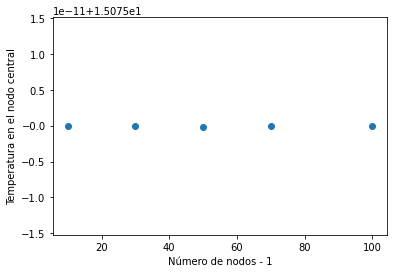

In [11]:
def calor(K,Q,n,phi_n,phi_0,L,):
    dx=1/(n)
    n=n-1
    tri_diag=np.zeros((n,n))
    b=np.zeros(n)
    for j in range(n):#Llenado de la matriz
        if j==0:
            tri_diag[j][j]=2
            tri_diag[j][j+1]=-1
            b[j]=Q*dx**2/K+phi_0
        if j==n-1:
            tri_diag[j][j-1]=-1
            tri_diag[j][j]=2
            b[j]=Q*dx**2/K+phi_n
        if (j>0):
            if(j<n-1):
                tri_diag[j][j]=2
                tri_diag[j][j+1]=-1
                tri_diag[j][j-1]=-1
                b[j]=Q*dx**2/K
    L_m,U_m=factorizar_LU(tri_diag)#Descomposición
    y=inferior(L_m,b)#Resolver Ly=b
    x=superior(U_m,y)#Resolver Ux=y
    return x
n=4
print("Configuración: {Q=3, K=5, \Phi_{0}=10, \Phi_{n}=20, n=4, L=1}\n")
print(calor(K=5,Q=3,n=n,phi_n=20,phi_0=10,L=1))
n=100
print("\nConfiguración: {Q=3, K=5, \Phi_{0}=10, \Phi_{n}=20, n=100, L=1}\n")
print(calor(K=5,Q=3,n=n,phi_n=20,phi_0=10,L=1))
N=[10, 30, 50, 70, 100]
temp_media=[]
for n in N:
    temp_media.append(calor(K=5,Q=3,n=n,phi_n=20,phi_0=10,L=1)[int(np.floor(n/2)-1)])#Guardamos la temperatura del nodo central.
import matplotlib.pyplot as plt
plt.plot(N,temp_media,'o')
plt.xlabel("Número de nodos - 1");
plt.ylabel("Temperatura en el nodo central");

In [13]:
matriz=np.loadtxt("M_sys_3x3.txt",skiprows=1)
b=np.loadtxt("V_sys_3x1.txt",skiprows=1)
x_0=np.zeros(3)
print('Jacobi:')
print(Jacobi(matriz,b,tol=10**(-6),x_0=x_0))
print('\nGauss-Seidel:')
print(Gauss_Seidel(matriz,b,tol=10**(-6),x_0=x_0))
print('Solucion real:')
print(np.linalg.solve(matriz,b))


Jacobi:
numero de iteraciones:  7
[ 3.  -2.5  7. ]

Gauss-Seidel:
numero de iteraciones:  5
[ 3.  -2.5  7. ]
Solucion real:
[ 3.  -2.5  7. ]


In [14]:
#Algo está pasando.
matriz=np.loadtxt("M_sys_125x125.txt",skiprows=1)

b=np.loadtxt("V_sys_125x1.txt",skiprows=1)
tol=0.05
x_0=np.zeros(125)
print('Jacobi:')
print(Jacobi(matriz,b,tol=10**(-6),x_0=x_0,max_iter=1000))
print('\nGauss-Seidel:')
print(Gauss_Seidel(matriz,b,tol=10**(-6),x_0=x_0,max_iter=1000))
print('Solucion real:')
print(np.linalg.solve(matriz,b))
print('\nError entre Gauss-Seidel y solve():')
print(np.linalg.norm(np.linalg.solve(matriz,b)-Gauss_Seidel(matriz,b,tol=10**(-6),x_0=x_0,max_iter=1000)))

Jacobi:
Iteracion maxima alcanzada

Gauss-Seidel:
numero de iteraciones:  818
[0.60489006 0.56796134 0.00673795 0.60314733 0.59777799 0.58869234
 0.48585538 0.37038972 0.00673795 0.19108498 0.57583907 0.07442916
 0.60449781 0.12312427 0.5384855  0.44927298 0.3364079  0.20797757
 0.59380668 0.38380213 0.05049178 0.52341523 0.2466667  0.5381065
 0.00673795 0.15310863 0.57435791 0.36651514 0.44302486 0.14740145
 0.57182201 0.58282624 0.00673795 0.51858456 0.50150541 0.55867336
 0.1134294  0.08209035 0.21907726 0.39560905 0.24116394 0.35456412
 0.60096647 0.55777097 0.08596715 0.11692249 0.18247558 0.14168859
 0.21167732 0.17769584 0.27459154 0.32620623 0.49869095 0.47130775
 0.42338455 0.47398937 0.49690971 0.27292997 0.43755395 0.41389823
 0.3106328  0.38698871 0.54913693 0.00673795 0.00673795 0.53807619
 0.44257554 0.48241449 0.44681225 0.28912426 0.4050288  0.35574854
 0.26466239 0.13926574 0.5260278  0.00673795 0.00673795 0.32827603
 0.19393286 0.00673795 0.5126403  0.05387026 0.08198